In [4]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
import graphviz

# reading csv
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
def importdata(): 
    balance_data = pd.read_csv('diabetes.csv') 
    # Printing the data shape
    print ("Dataset Lenght: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
    # Printing the dataset obseravtions 
    print ("Dataset: ",balance_data.head()) 
    return balance_data 

In [6]:
# Function to spLit the dataset 
def splitdataset(balance_data): 
    # Seperating the target variabLe 
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0] 
    # SpLiting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100) 
    return X, Y, X_train, X_test, y_train, y_test 

In [7]:
# Function to make predictions 
def prediction(X_test, clf_object,X_train): 
    # Predicton on test with ginilndex 
    y_pred_test = clf_object.predict(X_test)
    y_pred_train = clf_object.predict(X_train)
    print("Predicted values:") 
    #print(y_pred)
    return y_pred_test,y_pred_train 

In [8]:
# Function to caLcuLate accuracy 
def cal_accuracy(y_test, y_pred,y_pred_train,y_train): 
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
    print ("Accuracy Test: ", accuracy_score(y_test, y_pred)*100) 
    print ("Accuracy Train: ", accuracy_score(y_train, y_pred_train)*100) 
    print("Report : ", classification_report(y_test, y_pred)) 

In [9]:
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [10]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train): 
    # Creating the cLassifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 1001, max_depth=3, min_samples_leaf=5) 
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [11]:
def train_using_random_forest(X_train,X_test, y_train):
    clf_forest = RandomForestClassifier(n_estimators=100)
    clf_forest.fit(X_train, y_train)
    return clf_forest

In [12]:
# Driver code 
def main(): 
    # BuiLding Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
    clf_forest = train_using_random_forest(X_train, X_test, y_train) 
    # OperationaL Phase 
    print("Results Using Gini Index:") 
    # Prediction using gini 
    y_pred_gini,y_pred_train = prediction(X_test, clf_gini,X_train) 
    cal_accuracy(y_test, y_pred_gini,y_pred_train,y_train) 
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy, y_pred_train = prediction(X_test, clf_entropy,X_train) 
    cal_accuracy(y_test, y_pred_entropy,y_pred_train,y_train) 
    # Prediction using forest
    print("Results Using Forest:") 
    y_pred_forest, y_pred_train = prediction(X_test, clf_forest,X_train) 
    cal_accuracy(y_test, y_pred_forest,y_pred_train,y_train) 
# calling main function
if __name__=="main":
    main()

In [13]:
main()

Dataset Lenght:  768
Dataset Shape:  (768, 9)
Dataset:     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Results Using Gini Index:
Predicted values:
Confusion Matrix:  [[16  5  9  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [17 11 13  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [12  9  9  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 9  3  3  0  0  1  0  0  0  0

C:\Users\Javed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Javed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Javed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


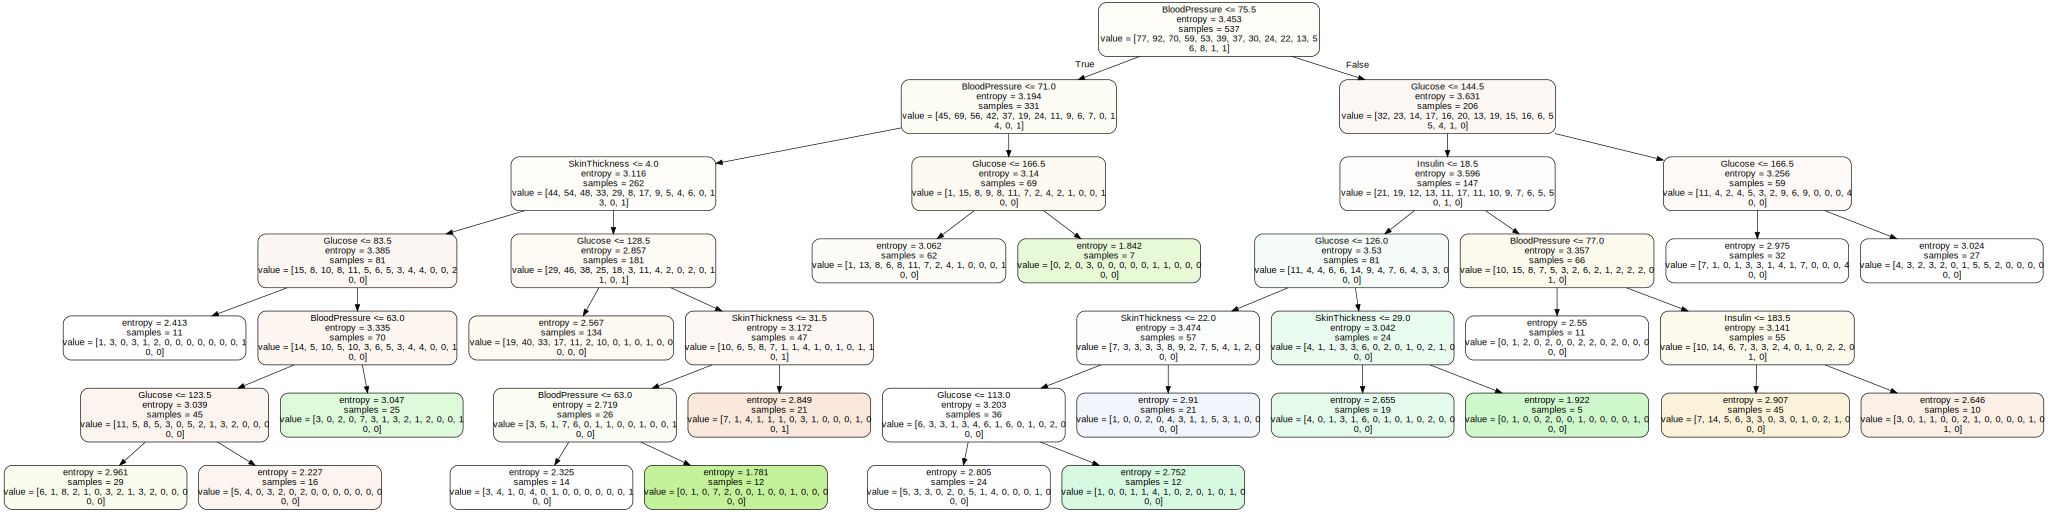

In [14]:
balance_data = pd.read_csv('diabetes.csv') 
X = balance_data.iloc[:, 1:5]
Y = balance_data.iloc[:, 0] 
#train test split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100) 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_leaf_nodes = 20) 
clf_entropy.fit(X_train, y_train) 
# code for printing tree
import os
from sklearn import tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

feature_names = X.columns
dot_data = tree.export_graphviz(clf_entropy, out_file = None, filled=True, rounded=True,
                               feature_names=feature_names)
#graph = graphviz.Source(dot_data,format='png').view()
graph = graphviz.Source(dot_data,format='png')
graph

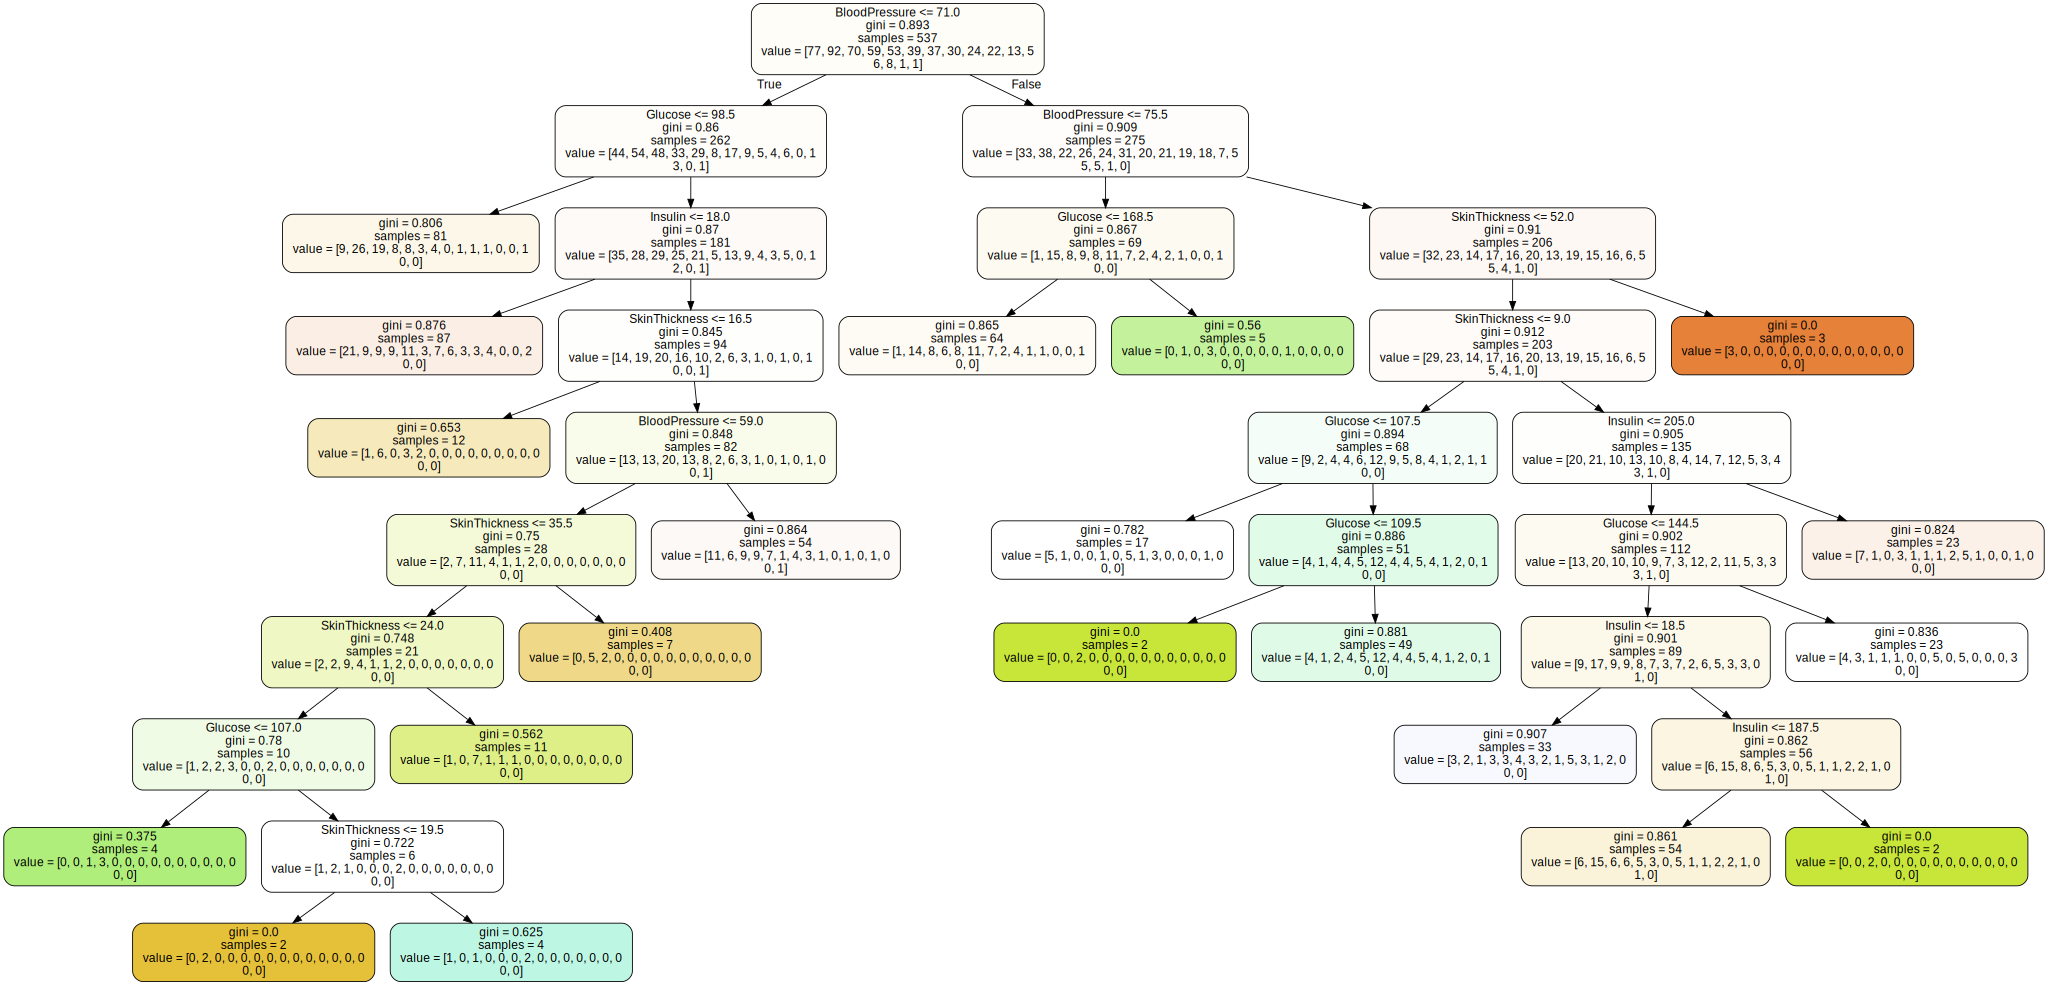

In [15]:
balance_data = pd.read_csv('diabetes.csv') 
X = balance_data.iloc[:, 1:5]
Y = balance_data.iloc[:, 0] 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100) 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_leaf_nodes = 20) 
clf_gini.fit(X_train, y_train) 

import os
from sklearn import tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

feature_names = X.columns


#class_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI,DiabetesPedigreeFunction','Age','Outcome']
dot_data = tree.export_graphviz(clf_gini, out_file = None, filled=True, rounded=True,
                               feature_names=feature_names)
graph = graphviz.Source(dot_data,format='png')
graph

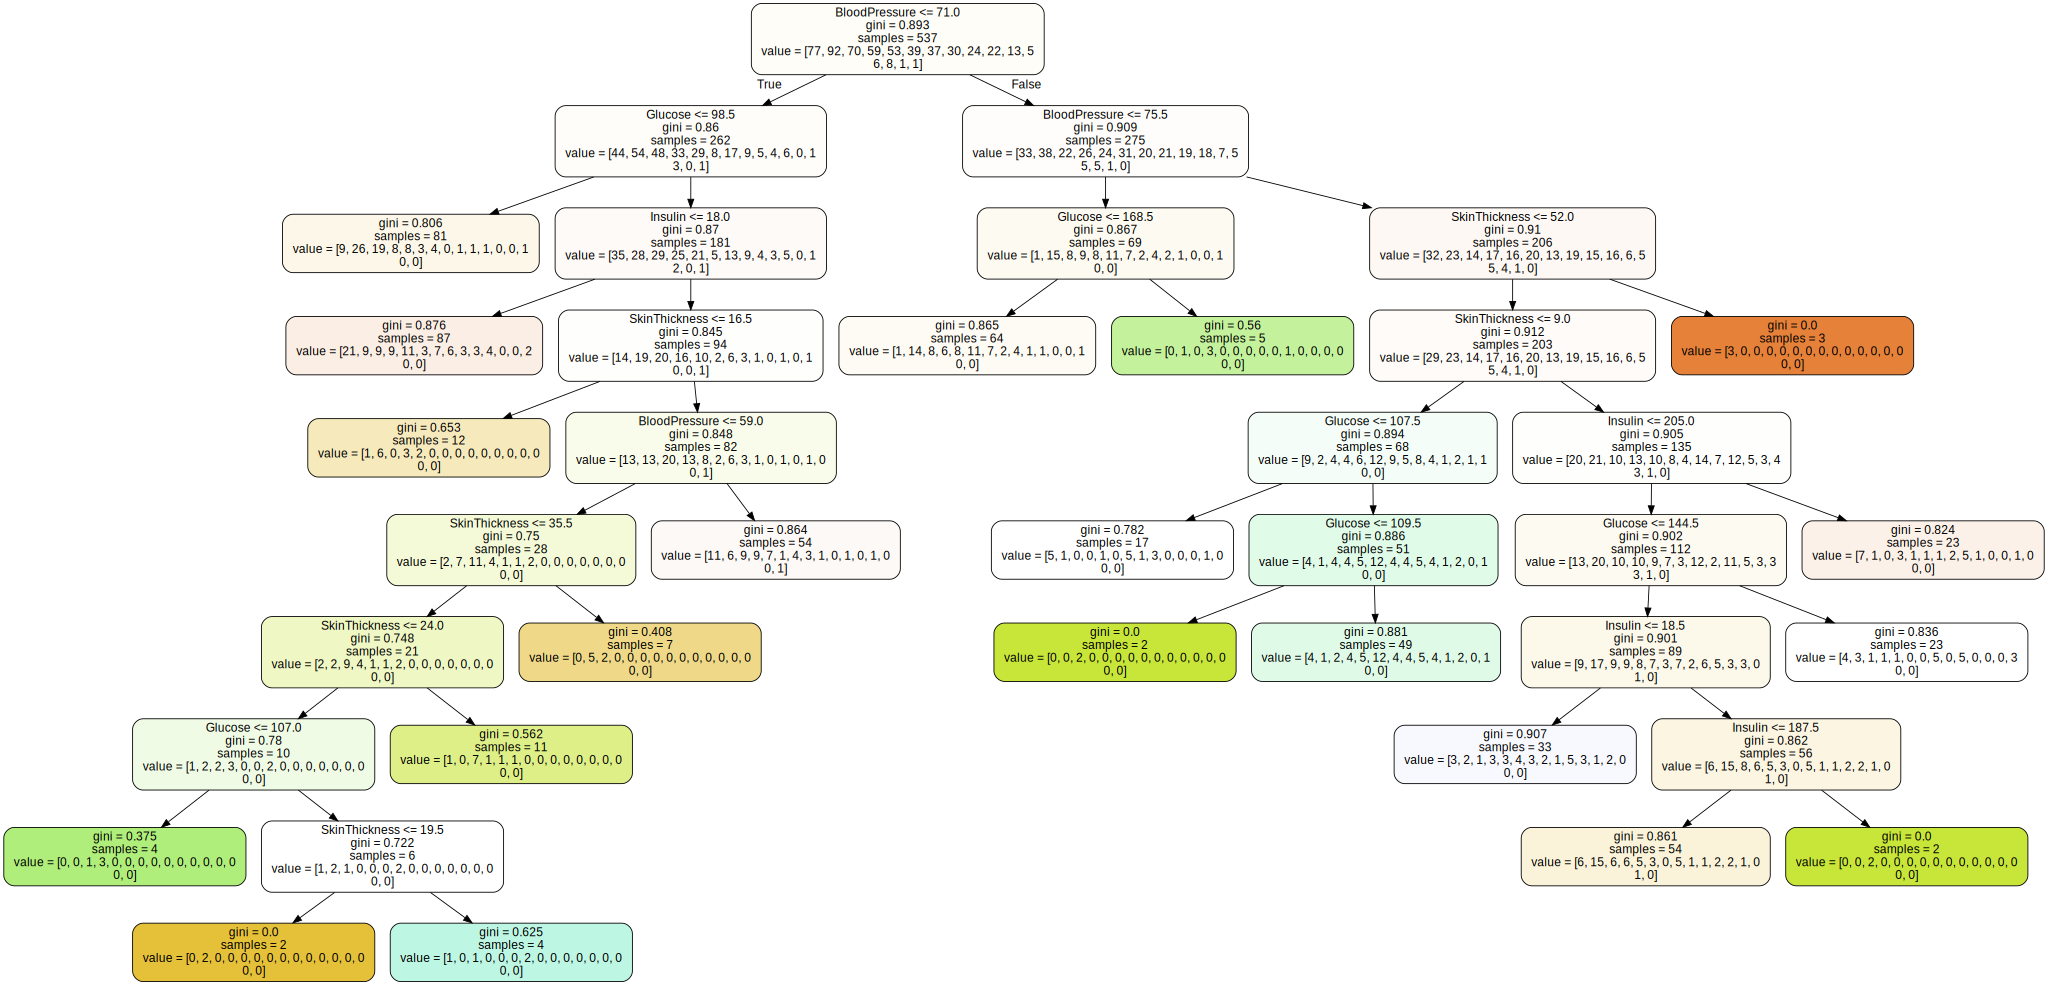

In [16]:
balance_data = pd.read_csv('diabetes.csv') 
X = balance_data.iloc[:, 1:5]
Y = balance_data.iloc[:, 0] 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100) 
clf_forest = RandomForestClassifier(n_estimators=100)
clf_forest.fit(X_train, y_train)

import os
from sklearn import tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

feature_names = X.columns


#class_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI,DiabetesPedigreeFunction','Age','Outcome']
dot_data = tree.export_graphviz(clf_gini, out_file = None, filled=True, rounded=True,
                               feature_names=feature_names)
graph = graphviz.Source(dot_data,format='png')
graph